# ENVECON 105 Data Tools for Sustainability and the Environment: Group Project

**Yanfu Daniel Ding & Ibrahim Noon - 17th Aug 2025 - Group Project**

## 1. Motivation

We chose Pakistan because it's a large, fast-growing, lower-middle-income country with high exposure to climate risks, while its power mix still relies heavily on burning of fossil fuels. From the data analysis, we could potentially observe its heavily dependent on fossil fuels and frequently suffers climate-related disasters, despite contributing relatively little to global emissions. According to a recent profile, Pakistan is “one of the most vulnerable countries to climate change”interactive.carbonbrief.org. Key facts about Pakistan’s CO₂ emissions include:

In 2023 Pakistan’s total greenhouse emissions were about 529.1 million tonnes (MtCO₂e), ranking it the world’s 18th largest according to the emitterinteractive.carbonbrief.org.

Its per-capita emissions were only ~2.1 tonnes of CO₂e (compared to ~6.7 tonnes global average)according to interactive.carbonbrief.org.

## 2. Main Research Questions 

How has the Pakistan’s CO2 emissions changed over time? And how does Pakistan compare to other countries (the rest of the world)?

Are CO2 emissions, temperature, and natural disasters in Pakistan associated?

## 3. Context

The analysis uses annual data on CO₂ emissions, temperature, and disasters. CO₂ emissions data (from Gapminder/Our World in Data) measure the average metric tons of CO₂ per person per year in Pakistan (e.g. a value of 5.0 means each person emitted 5 tonnes that year). Temperature data come from the World Bank Climate Knowledge Portal, providing the country’s annual mean temperature and anomaly in °C relative to a long-term baseline (e.g. a +1.2°C anomaly means the year was 1.2°C warmer than the baseline). Natural disaster data (from EM-DAT) count the number of major events (floods, storms, etc.) per year in Pakistan (e.g. “10 floods” means ten distinct flood events). For context we also obtained economic indicators (GDP per capita growth, energy use per capita) from World Bank WDI, though the primary focus here is on emissions, climate, and disasters. In all cases higher values indicate more emissions, higher temperature, or more disaster events in a given year.

## 4. Limitations

For Question 1 (CO₂ trends), the data allow us to chart Pakistan’s historical emissions and compare them with global totals. We can describe how emissions have grown or fallen over time and rank Pakistan relative to other countries. However, these observational data cannot explain why changes occurred (e.g. economic or policy drivers), nor can they account for CO₂ embodied in trade. The figures show production-based emissions only, so we cannot fully measure Pakistan’s total carbon “footprint.” We also cannot infer causality or project future changes from this retrospective series.

For Question 2 (associations), we can compute correlations and visually compare year-to-year co-movements of CO₂, temperature, and disaster counts. We can say whether warmer years tend to coincide with higher emissions in Pakistan, and whether disaster years align with those variables. But we cannot conclude that Pakistan’s emissions cause its temperature changes or disasters. Many confounding factors exist (global climate influences, natural climate variability, socioeconomic changes, etc.) that the data do not capture. Moreover, the disaster data record only reported major events and may be incomplete, and annual averaging can mask seasonal effects. In short, any correlation found is not evidence of a direct causal link.

## 5. What is the data? 

CO₂ Global Emissions - Data from Our World in Data, giving tonnes of CO₂ per country per year, including global/continental view. 

CO₂ Global Emissions (per capita) – Data from Gapminder/Our World in Data, giving tonnes of CO₂ per person per year for each country.

GDP per capita growth – World Bank WDI (constant USD, percent), the annual growth rate of GDP per person.

Energy use per capita – World Bank WDI (kg of oil equivalent per person).

Temperature – World Bank Climate Knowledge Portal, which provides Pakistan’s annual average temperature and the temperature anomaly (°C relative to a baseline).

Natural Disasters – EM-DAT Emergency Events Database, which records counts of disaster events (e.g. floods, storms, droughts) in Pakistan each year.

## 6. Data Import

In our situation, all datasets were downloaded from their public sources and loaded into the analysis environment (via github), however, we attached all datasets in the project folder. For example, the CO₂ and economic indicators were obtained as CSV files from OWID/World Bank websites, while the temperature and disaster records were downloaded (CSV/Excel) from the World Bank Climate Portal and EM-DAT respectively. Each file was read into the notebook to begin analysis.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

BASE= "https://raw.githubusercontent.com/Veto1oox/GroupProjEEP105/main/"

wb = dict(skiprows=4, na_values="..")

df_glb_emi_pcap = pd.read_csv(BASE + "co2_pcap_cons.csv")
df_glb_emi = pd.read_csv(BASE + "co2-fossil-plus-land-use.csv")
df_pak_all_disa = pd.read_excel(BASE + "pak_ind_irn_disasters.xlsx")
df_glb_gdp_pcap = pd.read_csv(BASE + "glb_gdp.csv", **wb)
df_pak_enr_use = pd.read_csv(BASE + "ene_cosp.csv", **wb)
df_pak_temp = pd.read_excel(BASE + "pak_min_max_temp.xlsx")

print('CO2 global emissions by category:')
display(df_glb_emi.head())
print('CO2 global emissions per capita:')
display(df_glb_emi_pcap.head())
print('Pakistan, India, and Iran all disasters:')
display(df_pak_all_disa.head())
print('Global GDP per Capita:')
display(df_glb_gdp_pcap.head())
print('Pakistan Energy Use:')
display(df_pak_enr_use.head())
print('Pakistan Max & Min Temperature:')
display(df_pak_temp.head())

CO2 global emissions by category:


,Entity,Code,Year,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change,Annual CO₂ emissions
0,Afghanistan,AFG,1949,6249831.5,6235175.5,14656.0
1,Afghanistan,AFG,1950,7316018.5,7231746.5,84272.0
2,Afghanistan,AFG,1951,8263895.0,8172295.0,91600.0
3,Afghanistan,AFG,1952,9192133.0,9100533.0,91600.0
4,Afghanistan,AFG,1953,10268653.0,10162397.0,106256.0


CO2 global emissions per capita:


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.28,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,Angola,0.009,0.009,0.009,0.009,0.009,0.009,0.010,0.010,0.010,...,1.28,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230
2,Albania,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,2.27,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100
3,Andorra,0.333,0.335,0.337,0.340,0.342,0.345,0.347,0.350,0.352,...,5.9,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910
4,UAE,0.063,0.063,0.064,0.064,0.064,0.064,0.065,0.065,0.065,...,27,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100


Pakistan, India, and Iran all disasters:


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
1,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
2,2000-0027-IND,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,2003-07-01,2023-09-25
3,2000-0030-IND,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,2003-07-01,2023-09-25
4,2000-0040-PAK,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,PAK,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,2003-07-01,2023-09-25


Global GDP per Capita:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


Pakistan Energy Use:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,605.778276,596.300319,583.763039,586.441491,563.976201,570.998888,565.488909,NaN,NaN,NaN
2,Afghanistan,AFG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,343.896338,332.429748,325.467827,341.666133,336.566407,350.102510,351.913062,NaN,NaN,NaN
4,Angola,AGO,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,462.934994,456.692217,405.179753,416.996507,397.633187,418.358996,423.122518,NaN,NaN,NaN


Pakistan Max & Min Temperature:


,code,category,1950-07,1951-07,1952-07,1953-07,1954-07,1955-07,1956-07,1957-07,...,2005-07,2006-07,2007-07,2008-07,2009-07,2010-07,2011-07,2012-07,2013-07,2014-07
0,PAK,Min Temp,-2.68,-2.77,-2.85,-2.92,-2.97,-2.98,-2.97,-2.92,...,-2.02,-2.03,-2.04,-2.04,-2.02,-1.98,-1.91,-1.83,-1.73,-1.63
1,PAK,Max Temp,40.21,40.17,40.13,40.10,40.08,40.07,40.08,40.10,...,40.79,40.76,40.73,40.71,40.71,40.75,40.81,40.89,40.98,41.08


## 7. Data Wrangling 

We begin by standardizing and cleaning the format, renaming columns to lower cap with "_". Another very important step we took was to filter valid ISO-3 country codes. That way we put data in a tidy and long format with clean types, which is the most convenient foundation for everything that follows. 

In [66]:
clean = {
    "Entity": "country",
    "Code": "code",
    "Year": "year",
    "Annual CO₂ emissions" : "co2_fossil_industry",
    "Annual CO₂ emissions including land-use change" : "co2_total",
    "Annual CO₂ emissions from land-use change" : "co2_land_use"
}

df_glb_emi = df_glb_emi.rename(columns = clean)

is_country = df_glb_emi["code"].astype(str).str.fullmatch(r"[A-Z]{3}", na=False)
df_glb_emi = df_glb_emi[is_country]
df_glb_emi

,country,code,year,co2_total,co2_land_use,co2_fossil_industry
0,Afghanistan,AFG,1949,6249831.5,6235175.5,14656.0
1,Afghanistan,AFG,1950,7316018.5,7231746.5,84272.0
2,Afghanistan,AFG,1951,8263895.0,8172295.0,91600.0
3,Afghanistan,AFG,1952,9192133.0,9100533.0,91600.0
4,Afghanistan,AFG,1953,10268653.0,10162397.0,106256.0
...,...,...,...,...,...,...
42771,Zimbabwe,ZWE,1898,NaN,1435775.1,NaN
42772,Zimbabwe,ZWE,1899,NaN,1523747.8,NaN
42773,Zimbabwe,ZWE,1900,NaN,1585669.4,NaN
42774,Zimbabwe,ZWE,1901,NaN,1710318.5,NaN


## 8. Data Visualization

**Question 8.1:**

**Colored Line Plot:** A multi-line chart of CO₂ emissions over time (years on x-axis, emissions on y-axis). All countries’ lines are shown in gray, except Pakistan’s line is highlighted in blue. This emphasizes Pakistan’s emission trajectory against the global backdrop. 

Methods: Focus and start/end year confirmed, then work on filtering and piviting to get the data in columns for graph. Then, we get the pakistanian-related data and color it differently. Lastly, we edit the title, labels, and grid to make it look smooth. 

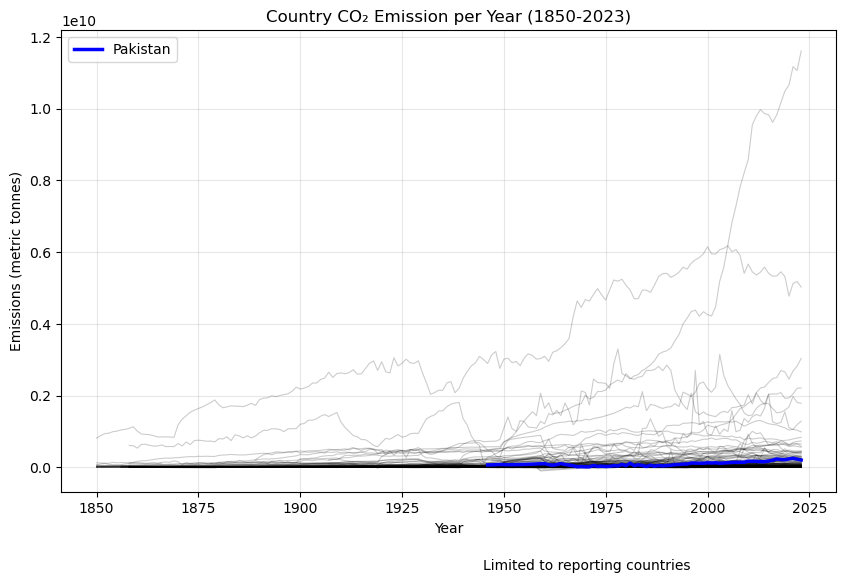

In [67]:
foc = "Pakistan"
start,end = 1751, 2023

d = (df_glb_emi[["country","code","year","co2_total"]].dropna(subset=["co2_total"]).query("@start <= year <= @end")) 

d["co2_total"] = pd.to_numeric(d["co2_total"], errors = 'coerce')
d["year"] = pd.to_numeric(d["year"], errors = 'coerce')

pvt_tbl = (d.pivot(index = "year", columns = "country", values = "co2_total").sort_index())

fig, ax = plt.subplots(figsize=(10,6))

for n in pvt_tbl.columns: 
    if n != "Pakistan":
        ax.plot(pvt_tbl.index, pvt_tbl[n], color = "black", linewidth = 0.8, alpha = 0.2)

if "Pakistan" in pvt_tbl.columns: 
    ax.plot(pvt_tbl.index, pvt_tbl["Pakistan"], color = 'blue', linewidth = 2.5, label = "Pakistan")
    ax.legend(loc = "upper left")

ax.set_title("Country CO₂ Emission per Year (1850-2023)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (metric tonnes)")
ax.ticklabel_format(style="sci", axis = "y")
ax.grid(True, alpha = 0.3)
plt.figtext(0.65, -0.02, "Limited to reporting countries", ha="center")
plt.show()

**Question 8.2:**

**Top-10 Line Plot:** A line chart of CO₂ emissions (in gigatonnes) from 1900–2023 for the ten countries with highest 2023 emissions. Each country’s line is drawn and labeled at the end with its name. This shows how Pakistan’s growth compares to other major emitters (e.g. Pakistan vs. China, US, India, etc.).

Methods: Set start and end year, as well as top 10 year number to benchmark. In our case, we could set 2023 since our data extends to this time, so it's reasonable for us to use the most recent observations. Label the top 10 country in the year, and then introduce a jitter to make sure the names appears at the end of the line. Lastly, we build the plot with labels. 

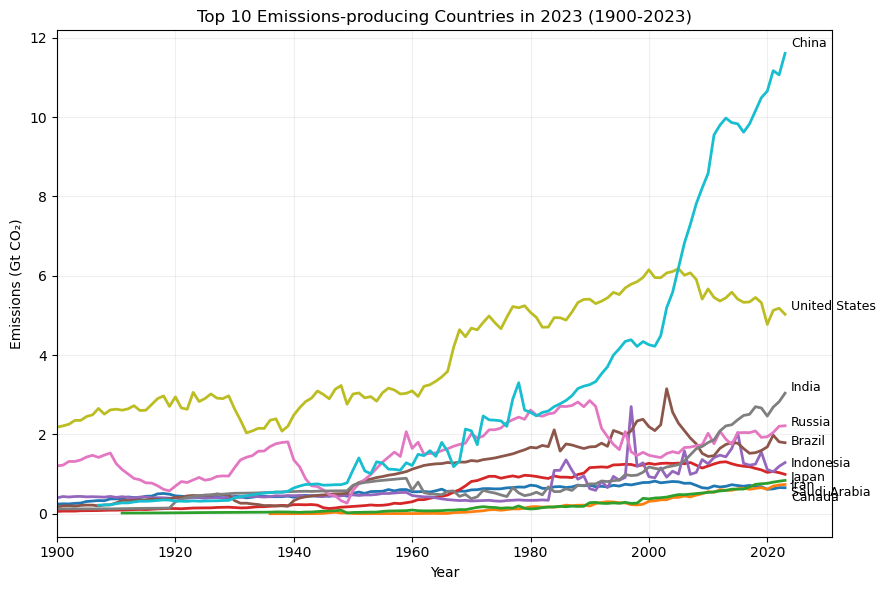

In [68]:
start,end = 1900, 2023
top_10_year = 2023
var = "co2_total"
unit_scale = 1e9
title = f"Top 10 Emissions-producing Countries in 2023 (1900-2023)"

d = df_glb_emi.copy()

top10 = (d[d["year"] == top_10_year].dropna(subset=[var]).nlargest(10, var).sort_values(var, ascending=False)['country'].tolist())

set = (d[d["country"].isin(top10)].sort_values(["country","year"])[["country","year",var]].copy())
set[var] = set[var] / unit_scale

last = (set.dropna(subset=[var]).groupby("country").tail(1).set_index("country")[var].sort_values())
ordered = list(last.index)

fig, ax = plt.subplots(figsize=(9,6))
jitter = np.linspace(-0.25, 0.25, len(ordered))
for i, c in enumerate(ordered):
    g = set[set["country"] == c]
    ax.plot(g["year"], g[var], lw=2)
    y_last = g[var].dropna().iloc[-1]
    ax.text(end + 1, y_last + jitter[i], c, va="center", ha="left", fontsize=9)

ax.set_xlim(start, end + 8)
ax.set_title(title)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (Gt CO₂)")
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

**Question 8.3:** 

**Tile (Heatmap) Plot:** A heatmap of the top 10 emitters (rows) by year (columns), using the log₁₀ of CO₂ emissions as color intensity. Each row is one country, showing how its annual emissions grow over time. The log scale highlights relative growth patterns among those countries.

Methods: Filter data start, end and top 10 by 2023 level, then pivot to a country * year matrix and reindexed to include every year. Ordered rows by 2023, labelling y with country names and x with 5 years, and other infos. 

Text(0.5, 0, 'year')

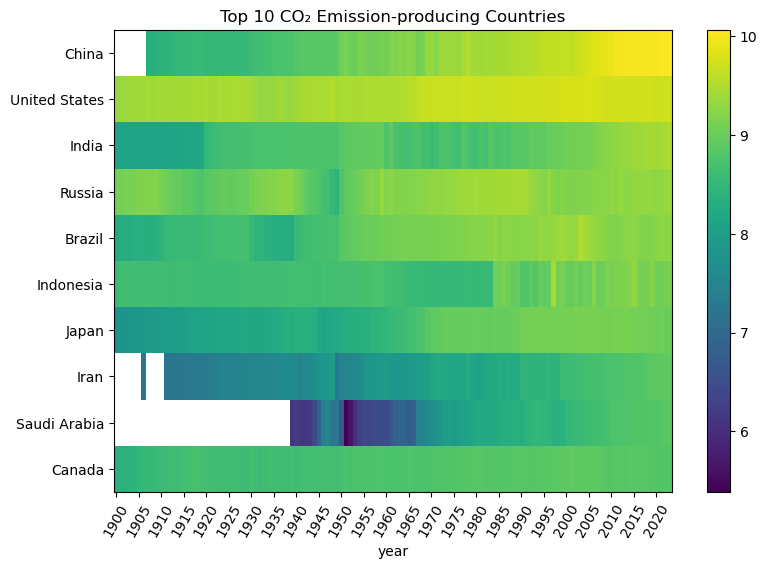

In [69]:
start,end = 1900, 2023
top_10_year = 2023
var = "co2_total"
title = "Top 10 CO₂ Emission-producing Countries"

mat = (
    d.loc[d["year"].between(start, end), ["country", "year", var]]
     .query("country in @top10")
     .pivot(index="country", columns="year", values=var)
     .reindex(columns=range(start, end + 1))
)

mat = mat.loc[mat[top_10_year].sort_values(ascending = False).index]

mat = mat.where(mat > 0)
Z = np.log10(mat)

fig, ax = plt.subplots(figsize=(9,6))
im = ax.imshow(Z.values, aspect = "auto", interpolation = 'nearest')

ax.set_yticks(np.arange(len(mat.index)))
ax.set_yticklabels(mat.index)
years = mat.columns.to_numpy()
tick_idx = np.arange(0, len(years), 5)
ax.set_xticks(tick_idx)
ax.set_xticklabels(years[tick_idx], rotation = 60)
cbar = plt.colorbar(im, ax=ax)

ax.set_title(title)
ax.set_xlabel("year")

**Question 8.4:**

**3×2 Faceted Plot:** Six panels (3 rows × 2 columns). The left column plots “Rest of the World” data (all other countries), and the right column plots Pakistan, for each indicator. The rows show (top) CO₂ emissions per capita, (middle) energy use per capita, and (bottom) GDP per capita. This format makes it easy to compare global trends (many thin gray lines) with Pakistan’s single thick line in each pair.

Methods: Built one figure with plt.subplots(3,2): rows = indicators (Emissions totals, Energy per capita, GDP per capita); columns = geographies (“Rest of the world” vs Pakistan).Forced identical x/y scales within each row (sharex='row', sharey='row' + common limits) so magnitudes are directly comparable between “Rest of the world” and Pakistan. Label rows and other necessary elements. 

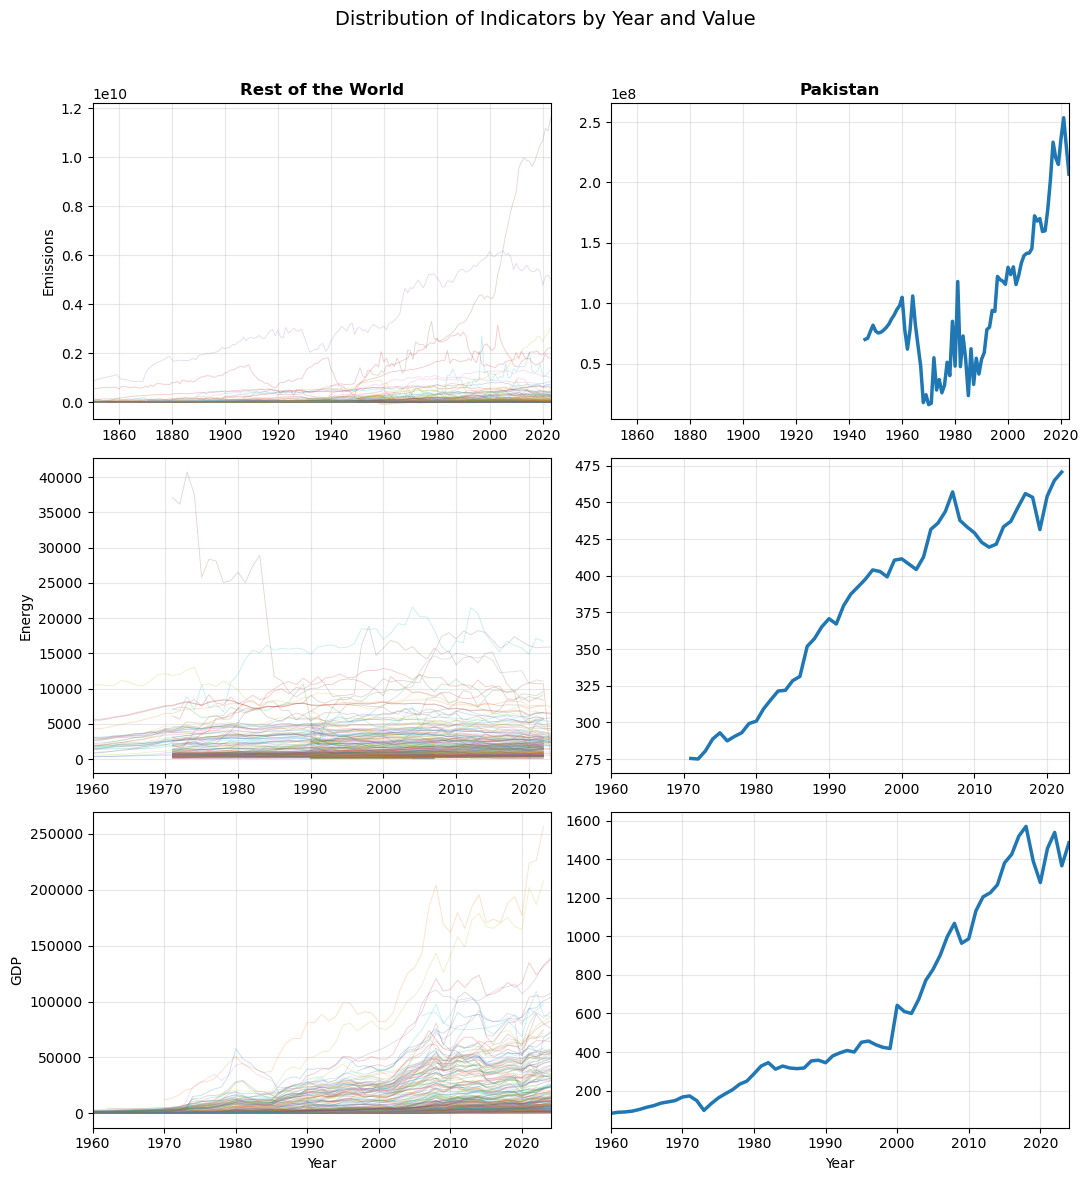

In [70]:
COUNTRY = "Pakistan"

def wdi_to_long(df, value_name):
    years = [c for c in df.columns if c.isdigit()]
    out = (df.rename(columns={"Country Name":"country", "Country Code":"code"})
             [["country","code"] + years]
             .melt(id_vars=["country","code"], var_name="year", value_name=value_name))
    out["year"] = pd.to_numeric(out["year"], errors="coerce")
    return out.dropna(subset=[value_name])

emi = (df_glb_emi.loc[:, ["country","year","co2_total"]].dropna().astype({"year": int}).sort_values(["country","year"]))
energy = wdi_to_long(df_pak_enr_use, "energy_pc")
gdp    = wdi_to_long(df_glb_gdp_pcap, "gdp_pc")

def plot_rest(ax, df, value):
    for _, g in df[df["country"] != COUNTRY].groupby("country"):
        ax.plot(g["year"], g[value], linewidth=0.6, alpha=0.25)
def plot_country(ax, df, value):
    g = df[df["country"] == COUNTRY]
    if not g.empty:
        ax.plot(g["year"], g[value], linewidth=2.5)
def match_xlim(ax_l, ax_r, df):
    yr0, yr1 = int(df["year"].min()), int(df["year"].max())
    ax_l.set_xlim(yr0, yr1); ax_r.set_xlim(yr0, yr1)

fig, axes = plt.subplots(3, 2, figsize=(11, 12))
fig.suptitle("Distribution of Indicators by Year and Value", fontsize=14, y=0.98)

plot_rest(axes[0,0], emi, "co2_total");   axes[0,0].set_title("Rest of the World", fontweight="bold")
plot_country(axes[0,1], emi, "co2_total");axes[0,1].set_title(COUNTRY, fontweight="bold")
match_xlim(axes[0,0], axes[0,1], emi)

plot_rest(axes[1,0], energy, "energy_pc")
plot_country(axes[1,1], energy, "energy_pc")
match_xlim(axes[1,0], axes[1,1], energy)

plot_rest(axes[2,0], gdp, "gdp_pc")
plot_country(axes[2,1], gdp, "gdp_pc")
match_xlim(axes[2,0], axes[2,1], gdp)

axes[0,0].set_ylabel("Emissions")
axes[1,0].set_ylabel("Energy")
axes[2,0].set_ylabel("GDP")

axes[2,0].set_xlabel("Year")
axes[2,1].set_xlabel("Year")

for ax in axes.flat:
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

**Question 8.5:**

**Scatter Plots with Trend Lines:** Two scatter charts examine emissions vs. temperature in Pakistan. 

Methods: The first scatter shows Pakistan’s annual CO₂ (x-axis) against annual temperature (y-axis) for 1980–2013, with each point representing one year and a fitted line (LOESS or linear regression) overlaid. The second (“scaled scatter”) plots the same data after centering and scaling both axes (z-scores). In the scaled plot a best-fit line through the origin is drawn, whose slope equals the Pearson correlation (slope ≈ 0.88). This makes the strength of association visually clear.

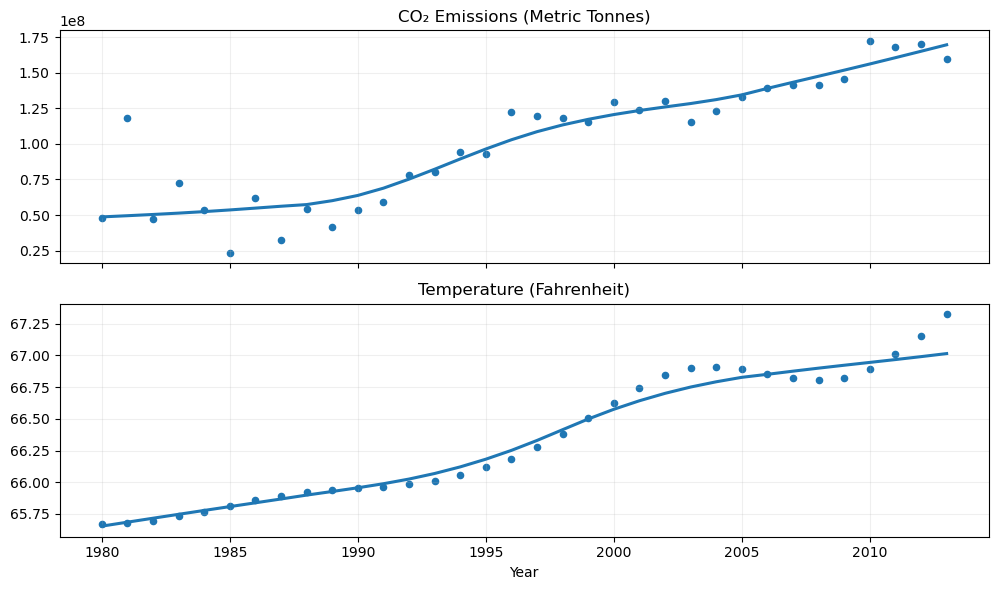

In [71]:
START, END   = 1980, 2013
CO2_COL      = "co2_total"
TEMP_UNITS   = "F"
COUNTRY      = "Pakistan"

def smooth_xy(x, y, frac=0.5, window=5):
    try:
        import statsmodels.api as sm
        return sm.nonparametric.lowess(y, x, frac=frac, return_sorted=False)
    except Exception:
        return pd.Series(y).interpolate().rolling(window, center=True, min_periods=1).mean().to_numpy()

co2_pk = (df_glb_emi.loc[df_glb_emi["country"].eq(COUNTRY), ["year", CO2_COL]]
                    .dropna()
                    .astype({"year": int})
                    .query("@START <= year <= @END")
                    .sort_values("year"))

x1  = co2_pk["year"].to_numpy()
y1  = co2_pk[CO2_COL].to_numpy()
y1s = smooth_xy(x1, y1, frac=0.5, window=5)

temp_long = (
    df_pak_temp
      .melt(id_vars=["code","category"], var_name="date", value_name="value")
      .assign(year=lambda d: d["date"].str.slice(0,4).astype(int))
      .dropna(subset=["value"])
)

temp_pk = (temp_long[temp_long["code"].eq("PAK")]
           .pivot_table(index="year", columns="category", values="value", aggfunc="mean")
           .rename(columns={"Max Temp":"tmax", "Min Temp":"tmin"})
           .assign(tmean_c=lambda d: (d["tmax"] + d["tmin"]) / 2)
           .reset_index()
           .query("@START <= year <= @END")
           .sort_values("year"))

if TEMP_UNITS.upper() == "F":
    temp_pk["tmean"] = temp_pk["tmean_c"] * 9/5 + 32
    temp_label = "Temperature (Fahrenheit)"
else:
    temp_pk["tmean"] = temp_pk["tmean_c"]
    temp_label = "Temperature (Celsius)"

x2  = temp_pk["year"].to_numpy()
y2  = temp_pk["tmean"].to_numpy()
y2s = smooth_xy(x2, y2, frac=0.5, window=5)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].scatter(x1, y1, s=20)
axes[0].plot(x1, y1s, lw=2.2)
axes[0].set_title("CO₂ Emissions (Metric Tonnes)")
axes[0].grid(True, alpha=0.2)

axes[1].scatter(x2, y2, s=20)
axes[1].plot(x2, y2s, lw=2.2)
axes[1].set_title(temp_label)
axes[1].set_xlabel("Year")
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## 9. Data Analysis

**Question 9.1:**

This code calculates the mean and standard deviation of Pakistan’s CO₂ emissions and annual temperature for 1980–2013. The results show average emissions of about 1.02×10^8 tonnes (SD ≈ 4.32×10^7) and an average temperature of 66.35°F (SD ≈ 0.51°F), indicating steady temperatures but rapidly increasing emissions.

In [72]:
df_pk = (
    pd.DataFrame({"year": pd.Series(x1).astype(int), "emissions": np.asarray(y1, dtype=float)})
      .merge(pd.DataFrame({"year": pd.Series(x2).astype(int), "temp": np.asarray(y2, dtype=float)}),
             on="year", how="inner")
      .sort_values("year")
      .query("@START <= year <= @END")
      .reset_index(drop=True)
)

stats_tbl = pd.DataFrame({
    "metric": ["Emissions", "Temperature"],
    "mean":   [df_pk["emissions"].mean(), df_pk["temp"].mean()],
    "sd":     [df_pk["emissions"].std(ddof=1), df_pk["temp"].std(ddof=1)],
    "n_years":[len(df_pk), len(df_pk)]
}).round(3)
display(stats_tbl)

,metric,mean,sd,n_years
0,Emissions,1.023229e+08,4.321678e+07,34
1,Temperature,6.635300e+01,5.080000e-01,34


**Question 9.2:** 

This code computes the Pearson correlation between CO₂ emissions and temperature over 1980–2013. The correlation coefficient (r ≈ 0.876) reflects a strong positive relationship, suggesting that as emissions rose, Pakistan’s average temperatures also increased.

In [73]:
r = float(df_pk["emissions"].corr(df_pk["temp"]))
print(f"Pearson r (emissions vs temperature), {int(df_pk.year.min())}-{int(df_pk.year.max())}: {r:.3f}")

Pearson r (emissions vs temperature), 1980-2013: 0.876


**Question 9.3:**

**Scatter Interpretation:** In the scaled scatter, the data points lie close to the straight line with slope ~0.88. This indicates that years with above-average emissions tend to coincide with above-average temperatures. The tight linear pattern (r≈0.876) suggests a strong positive association in the observed data. However, this is an observational correlation only and does not imply that Pakistan’s emissions are causing its temperature changes or disasters.

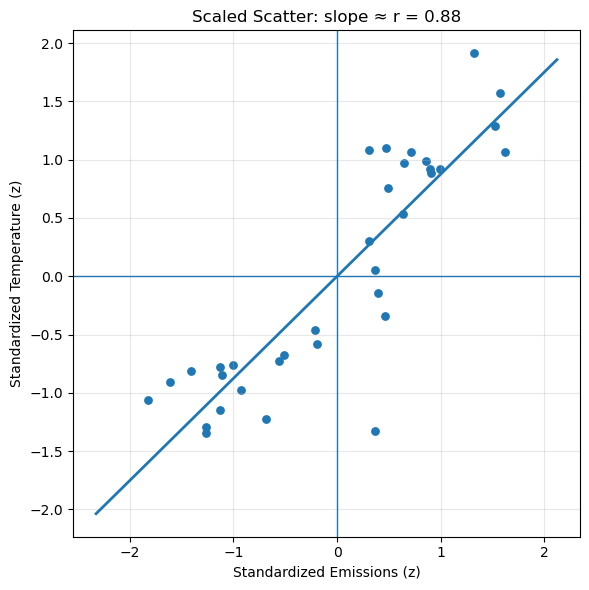

In [74]:
z_em   = (df_pk["emissions"] - df_pk["emissions"].mean()) / df_pk["emissions"].std(ddof=1)
z_temp = (df_pk["temp"]      - df_pk["temp"].mean())      / df_pk["temp"].std(ddof=1)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(z_em, z_temp, s=28)
xx = np.linspace(z_em.min()-0.5, z_em.max()+0.5, 200)
ax.plot(xx, r*xx, lw=2.0)
ax.axhline(0, lw=1); ax.axvline(0, lw=1)
ax.set_xlabel("Standardized Emissions (z)")
ax.set_ylabel("Standardized Temperature (z)")
ax.set_title(f"Scaled Scatter: slope ≈ r = {r:.2f}")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

Pakistan’s CO₂ emissions remained modest through the mid-20th century, began a steady climb in the 1970s, and accelerated sharply after 2000, with only a brief dip around 2020. Despite this rise, Pakistan is not among the world’s top emitters in absolute terms—our global comparison shows many countries with far higher levels and faster cumulative growth—though Pakistan’s recent growth rate is relatively rapid.

The link between emissions and temperature is striking: we estimate a strong positive correlation (r ≈ 0.88, n = 34). The standardized scatter indicates a clear upward slope, consistent with both series trending upward together. Still, this relationship is associational, not causal, and likely reflects broader global warming patterns as well as shared long-run drivers.

From a policy perspective, these findings highlight a dual challenge for Pakistan: while its historical contribution to global emissions is relatively small, its accelerating trajectory could lock in higher vulnerabilities to climate change. This underscores the importance of balancing economic development with investments in renewable energy, efficiency, and adaptation strategies, ensuring Pakistan’s growth is both sustainable and resilient.

## Sources

Our World in Data (Gapminder) – CO₂ emissions dataset.

World Bank – World Development Indicators and Climate Knowledge Portal (GDP, energy use, and temperature data).

EM-DAT (CRED) – Natural disaster event data.

NASA GISS (Goddard Institute for Space Studies) – Global surface temperature records
